In [1]:
import numpy as np
import pandas as pd
import string
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
categories = fetch_20newsgroups().target_names

In [5]:
from sklearn.datasets import fetch_20newsgroups
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True)

In [6]:
df = pd.DataFrame(X_train, columns=["text"])
df["target"] = y_train
print(df.head())

df_test = pd.DataFrame(X_test, columns=["text"])
df_test["target"] = y_test
print(df_test.head())

                                                text  target
0  From: lerxst@wam.umd.edu (where's my thing)\nS...       7
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...       4
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...       4
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...       1
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...      14
                                                text  target
0  From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...       7
1  From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...       5
2  From: mathew <mathew@mantis.co.uk>\nSubject: R...       0
3  From: bakken@cs.arizona.edu (Dave Bakken)\nSub...      17
4  From: livesey@solntze.wpd.sgi.com (Jon Livesey...      19


In [7]:
stop = stopwords.words('english')

In [8]:
stop_words = list(set(stopwords.words("english")))

In [9]:
def preprocess(string):
    processed_str = re.sub(r"\S+@\S+", '', string) #Remove Email
    processed_str = re.sub(r"\S+.co\S+", '', processed_str) #Remove Website
    processed_str = re.sub(r"\S+.ed\S+", '', processed_str) #Remove website
    processed_str = re.sub(r"\S+.in\S+", '', processed_str) #Remove website
    processed_str = re.sub(r"\S+.edu\S+", '', processed_str) #Remove website
    processed_str = re.sub(r"[0-9]+", '', processed_str) #Remove numbers
    return processed_str

In [10]:
X_train = df["text"].apply(preprocess)
X_test  = df_test["text"].apply(preprocess)

In [11]:
tfidf_vectorizer = TfidfVectorizer(lowercase=True, 
                        stop_words=stop_words, 
                       )

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [12]:
X_train_tfidf.shape

(11314, 73024)

In [13]:
X_test_tfidf.shape

(7532, 73024)

In [14]:
X_train_tfidf.nnz

1017008

In [15]:
X_test_tfidf.nnz

631911

In [16]:
from sklearn.naive_bayes import MultinomialNB

In [17]:
nb_model = MultinomialNB().fit(X_train_tfidf, df["target"])

In [18]:
all_pred_nb = nb_model.predict(X_test_tfidf)

In [19]:
from sklearn.neighbors import NearestCentroid

In [20]:
rocchio_model = NearestCentroid().fit(X_train_tfidf, df["target"])

In [21]:
all_pred_rc = rocchio_model.predict(X_test_tfidf)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn_model = KNeighborsClassifier().fit(X_train_tfidf, df["target"])

In [24]:
all_pred_knn = knn_model.predict(X_test_tfidf)

In [25]:
from sklearn.metrics import f1_score, recall_score, precision_score

In [26]:
print("precision score of Naive Bayse classifier")
precision_score(df_test["target"], all_pred_nb, average='macro')

precision score of Naive Bayse classifier


0.8363432540126308

In [27]:
print("recall score of Naive Bayse classifier")
recall_score(df_test["target"], all_pred_nb, average='macro')

recall score of Naive Bayse classifier


0.7868466879271618

In [28]:
print("f1 score for Naive Bayse classifier")
f1_score(df_test["target"], all_pred_nb, average='macro')

f1 score for Naive Bayse classifier


0.7820671046113149

In [29]:
print("precision score of Rocchio classifier")
precision_score(df_test["target"], all_pred_rc, average='macro')

precision score of Rocchio classifier


0.7713099423425411

In [30]:
print("recall score of Rocchio classifier")
recall_score(df_test["target"], all_pred_rc, average='macro')

recall score of Rocchio classifier


0.7248977059596903

In [31]:
print("f1 score for Rocchio classifier")
f1_score(df_test["target"], all_pred_rc, average='macro')

f1 score for Rocchio classifier


0.7366037643936172

In [32]:
print("precision score of KNN classifier")
precision_score(df_test["target"], all_pred_knn, average='macro')

precision score of KNN classifier


0.7109115523871894

In [33]:
print("recall score of KNN classifier")
recall_score(df_test["target"], all_pred_knn, average='macro')

recall score of KNN classifier


0.7017206408756015

In [34]:
print("f1 score for KNN classifier")
f1_score(df_test["target"], all_pred_knn, average='macro')

f1 score for KNN classifier


0.7020841025174253

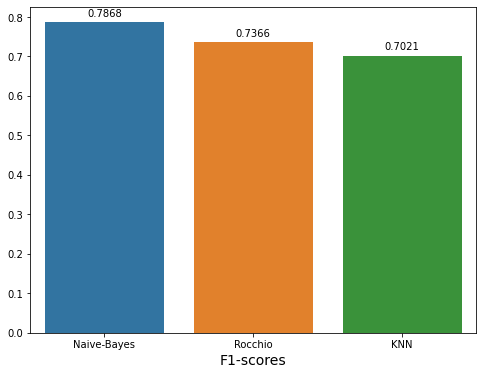

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

population=[0.844, 0.732, 0.788]
cv_metrics = pd.DataFrame({"Naive-Bayes": 0.7868466879271618,
                           "Rocchio": 0.7366037643936172,
                          "KNN": 0.7020841025174253
                          },
                         index=[0])
plt.figure(figsize=(8, 6))
splot=sns.barplot(data=cv_metrics)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("F1-scores", size=14);

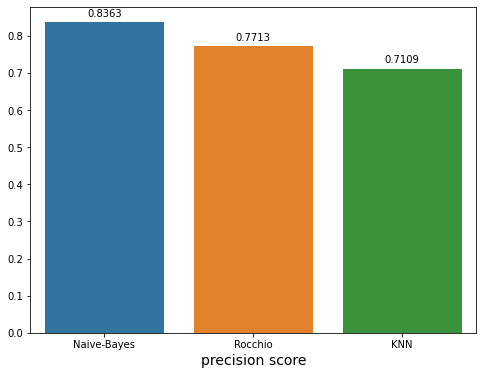

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

population=[0.844, 0.732, 0.788]
cv_metrics = pd.DataFrame({"Naive-Bayes": 0.8363432540126308,
                           "Rocchio": 0.7713099423425411,
                          "KNN": 0.7109115523871894
                          },
                         index=[0])
plt.figure(figsize=(8, 6))
splot=sns.barplot(data=cv_metrics)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("precision score", size=14);

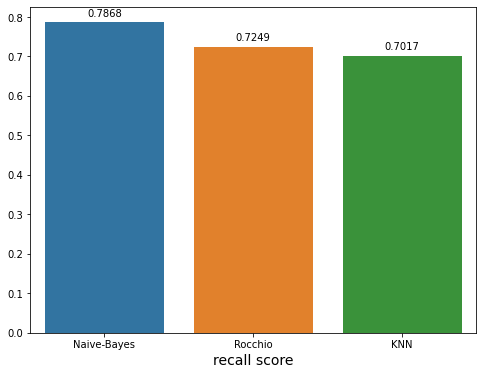

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

population=[0.844, 0.732, 0.788]
cv_metrics = pd.DataFrame({"Naive-Bayes": 0.7868466879271618,
                           "Rocchio": 0.7248977059596903,
                          "KNN": 0.7017206408756015
                          },
                         index=[0])
plt.figure(figsize=(8, 6))
splot=sns.barplot(data=cv_metrics)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("recall score", size=14);